**Key Notes for Implementation**

Pretrained Model:


*   Faster R-CNN is pretrained on COCO, making it suitable for detecting "person" cand "ball" classes without additional training.



Video-to-Frames Workflow:

* Video is split into frames to allow frame-by-frame processing.
* This approach simplifies the application of object detection.

Visualization:

* Bounding boxes and labels are visualized for interpretability.
* Confidence thresholds are applied to filter out low-confidence predictions.

Frame-to-Video Conversion:

* Ensures the processed frames are reassembled into a video for easy viewing and sharing.

In [1]:
pip install torch torchvision pycocotools matplotlib opencv-python


In [32]:
import cv2

video_path = "/content/Football match.mp4"
cap = cv2.VideoCapture(video_path)
frame_count = 0

while True:
    success, frame = cap.read()
    if not success:
        break  # Exit the loop if no more frames
    frame_path = f"frame_{frame_count}.jpg"
    cv2.imwrite(frame_path, frame)  # Save the frame as an image
    frame_count += 1

cap.release()
total_frames = frame_count
print(f"{total_frames} frames have been saved.")


1074 frames have been saved.


In [25]:
pip install --upgrade torch torchvision


In [26]:
import torch
import torchvision

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

print(model)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [27]:
from torchvision.transforms import functional as F
from PIL import Image

def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return F.to_tensor(image)  # Convert to tensor for the model

frame = preprocess_image("frame_0.jpg")


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_predictions(image_path, predictions, threshold=0.5):
    """Visualize predictions on an image."""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    boxes = predictions[0]['boxes']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']

    for box, label, score in zip(boxes, labels, scores):
        if score > threshold:
            x1, y1, x2, y2 = box.int().tolist()
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis("off")
    plt.show()



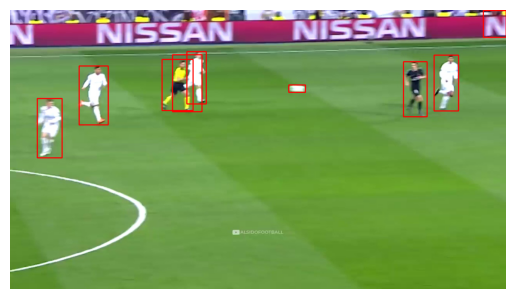

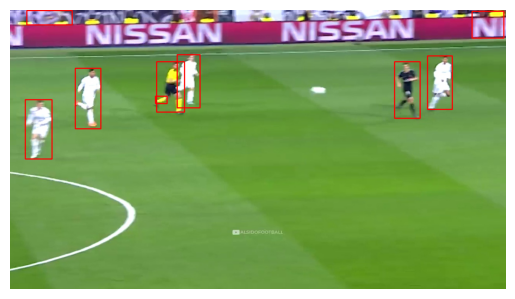

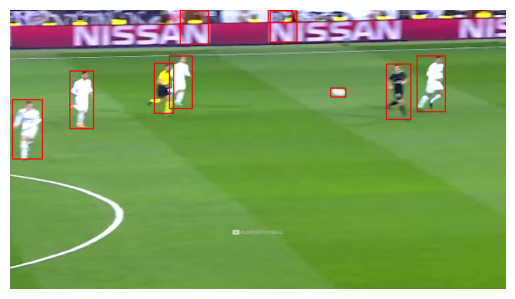

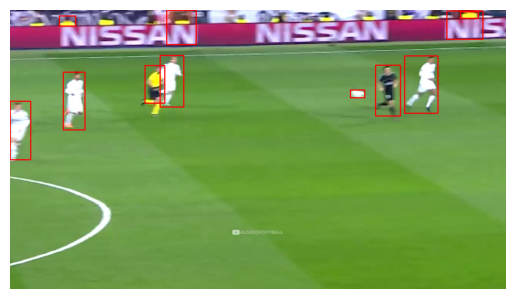

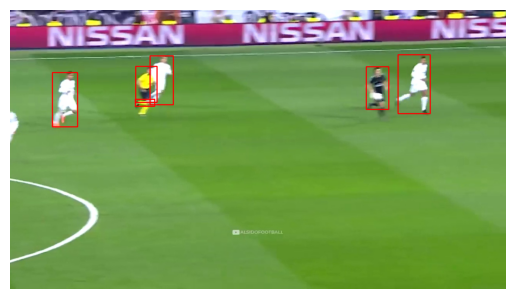

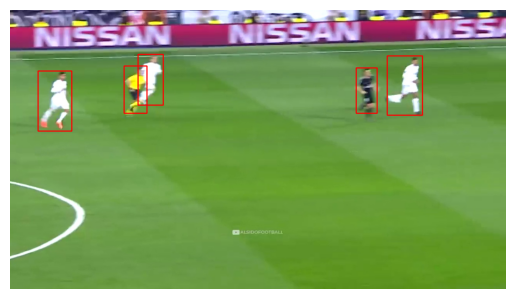

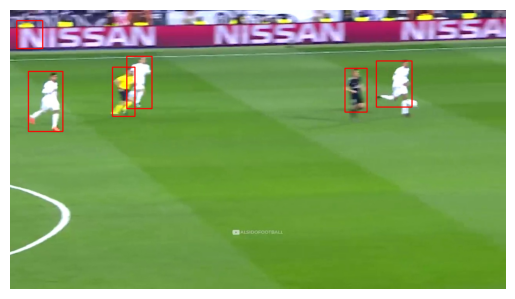

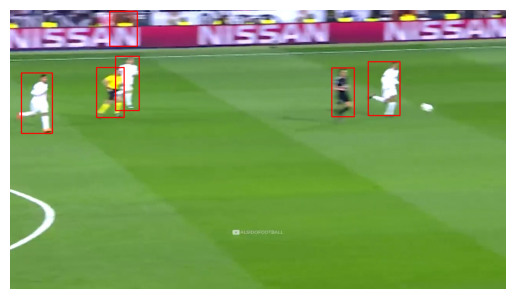

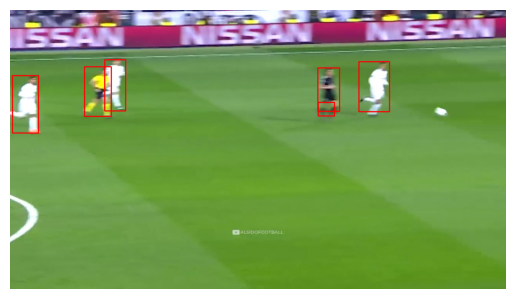

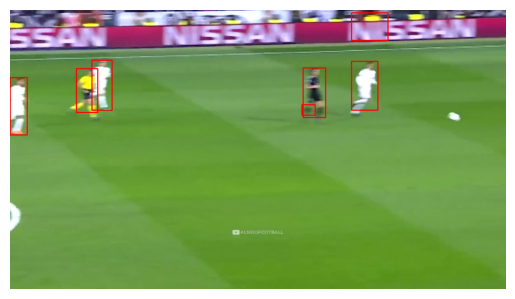

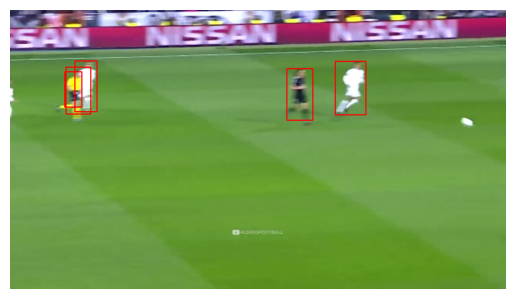

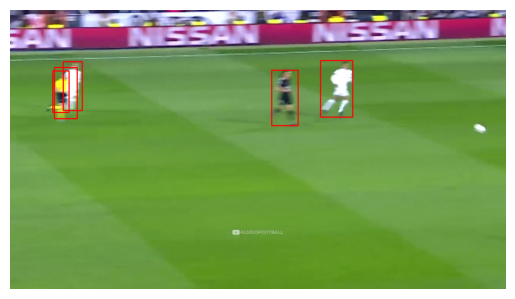

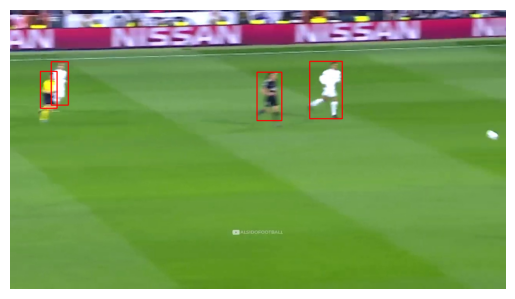

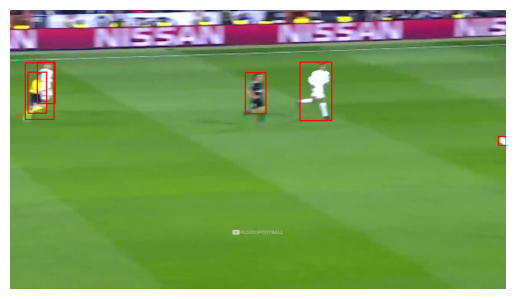

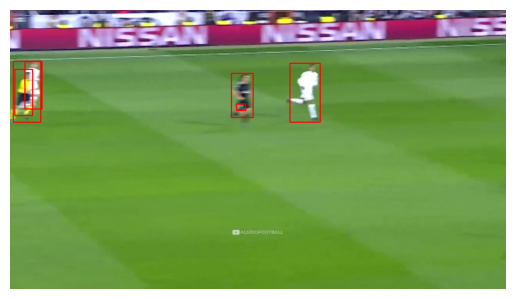

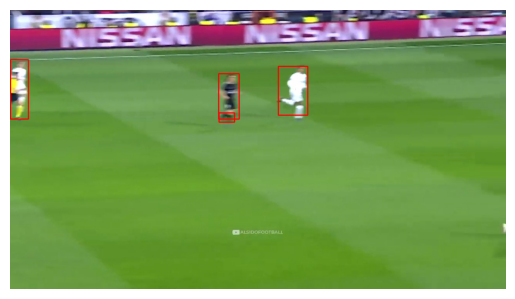

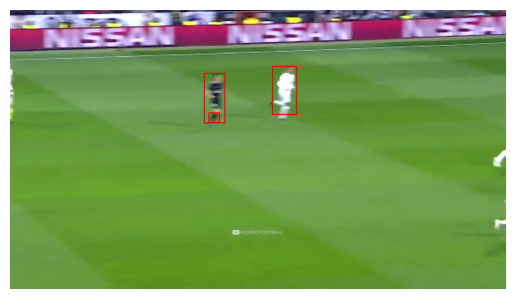

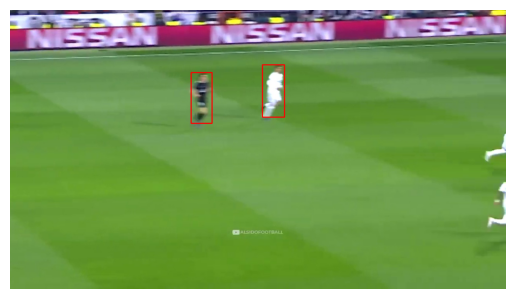

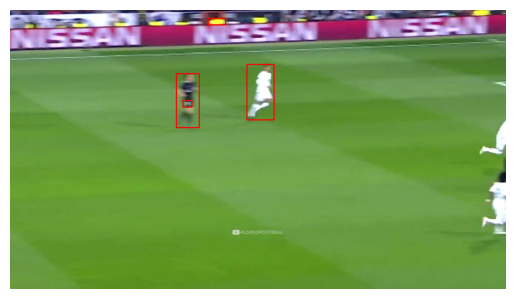

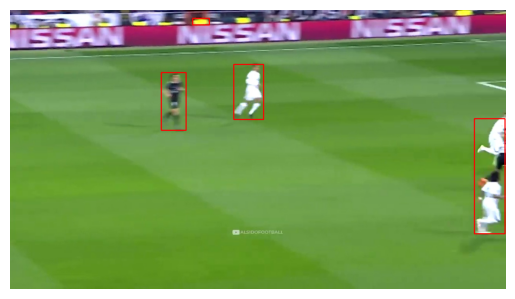

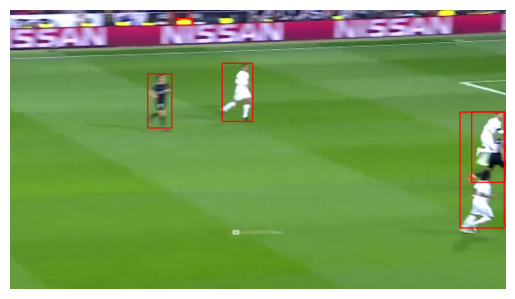

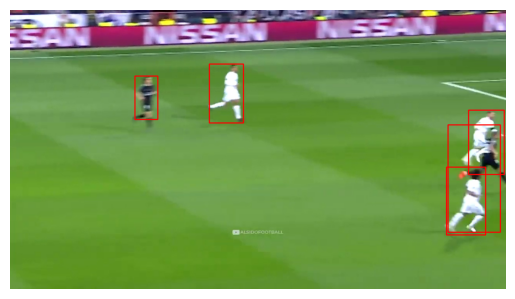

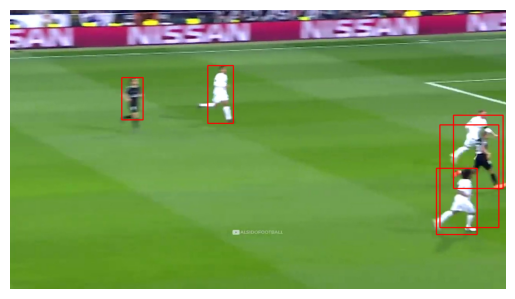

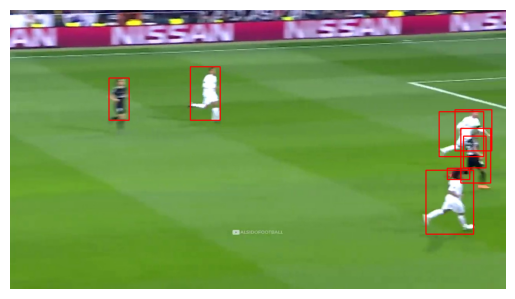

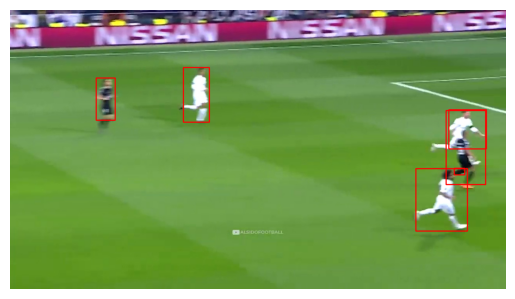

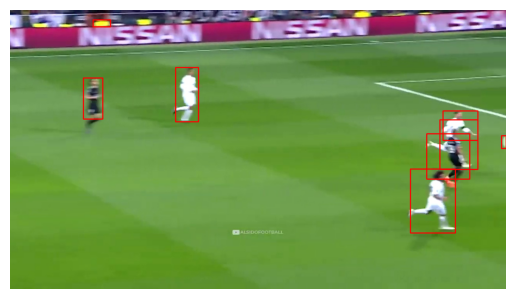

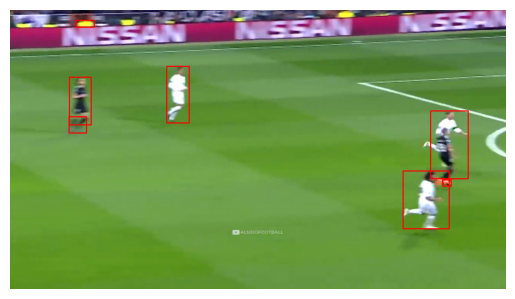

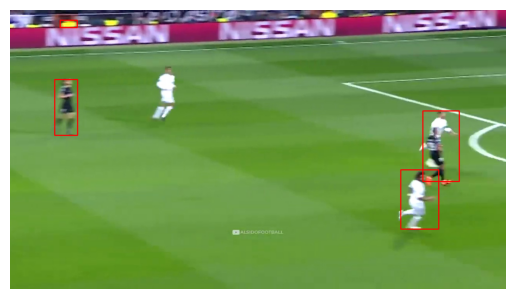

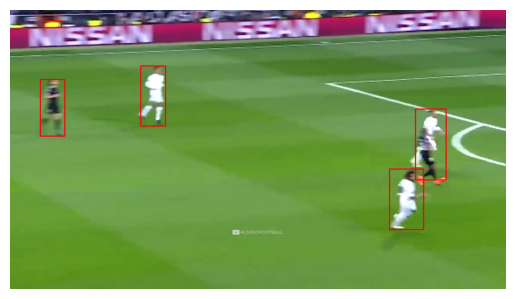

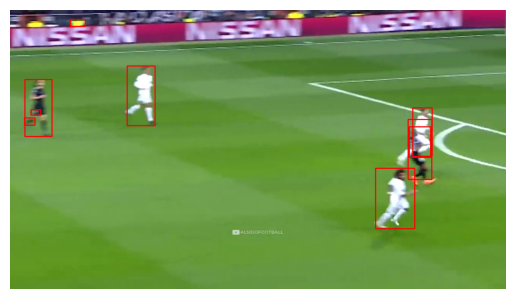

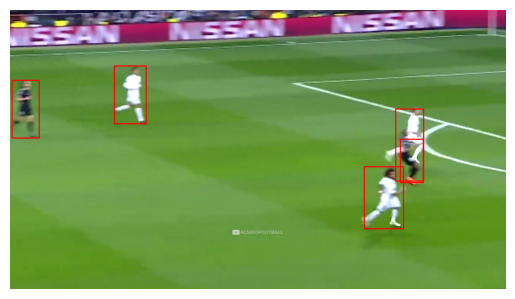

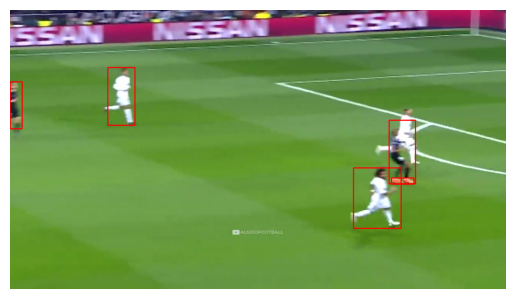

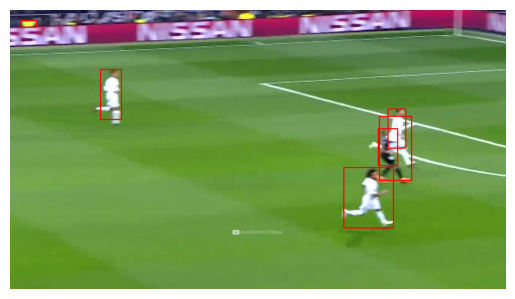

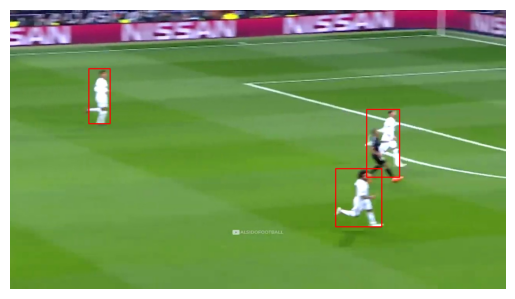

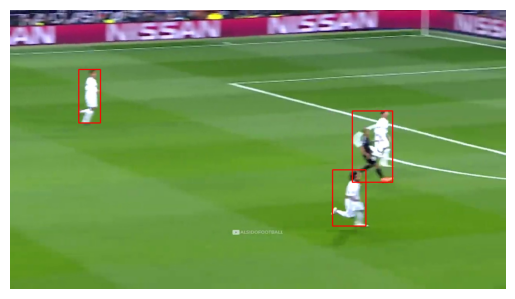

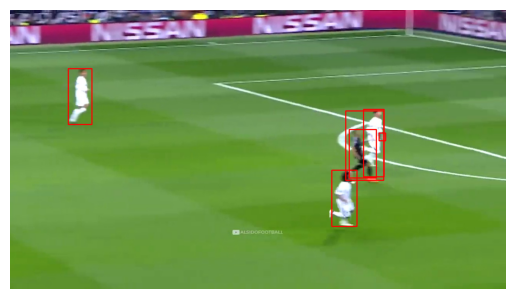

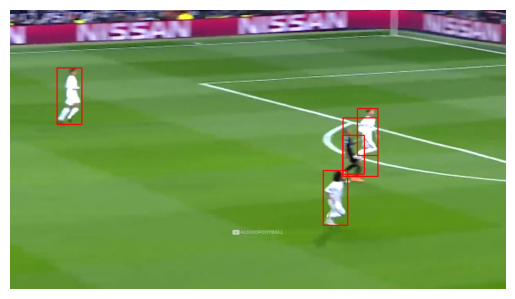

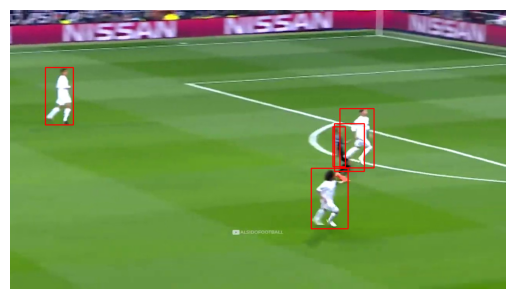

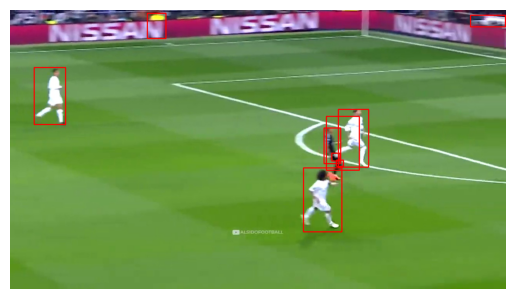

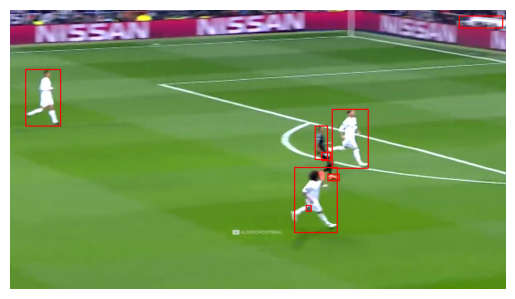

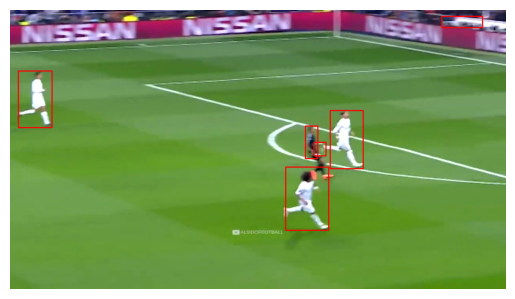

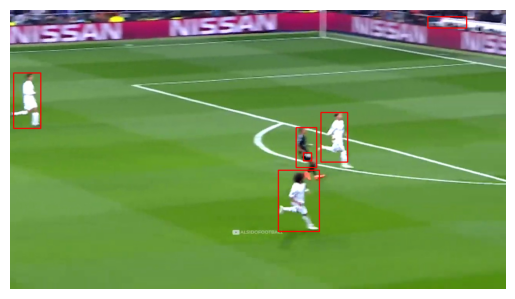

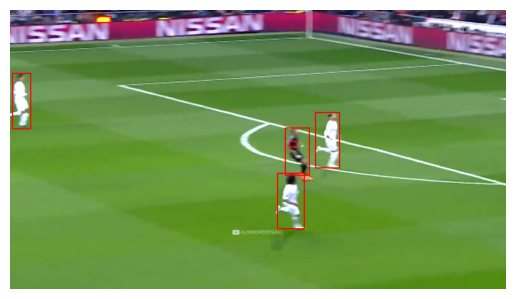

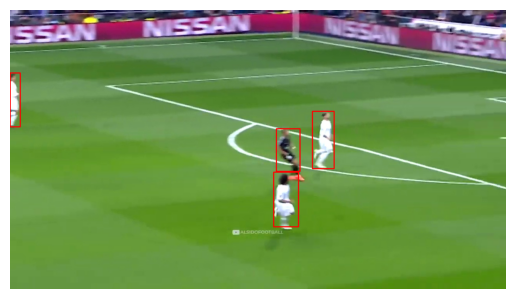

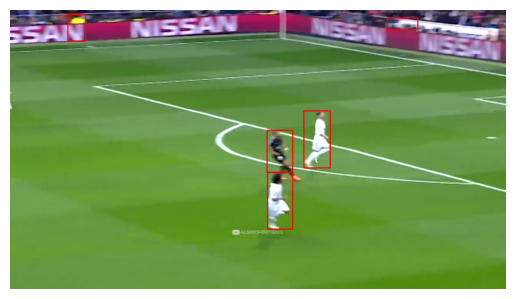

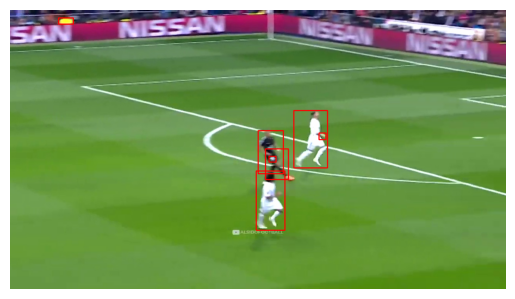

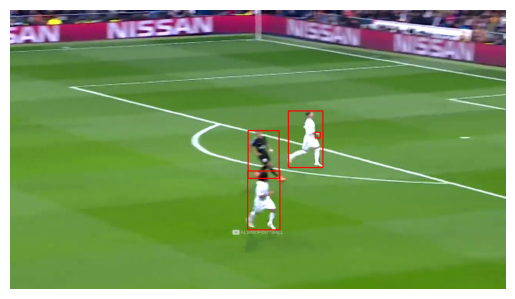

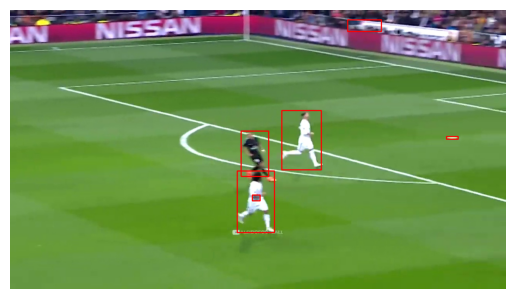

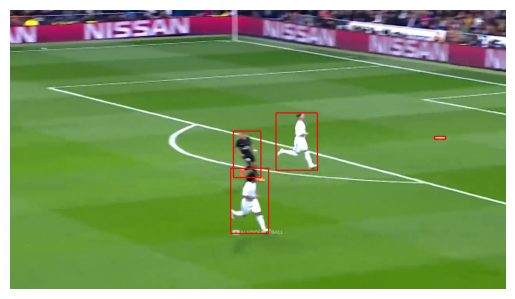

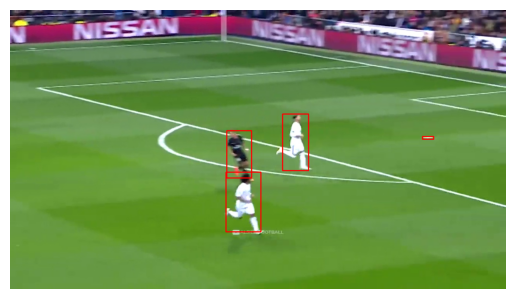

In [36]:
max_frames = 50
for frame_idx in range(min(total_frames, max_frames)):
    frame = preprocess_image(f"frame_{frame_idx}.jpg")
    with torch.no_grad():
        predictions = model([frame])
    visualize_predictions(f"frame_{frame_idx}.jpg", predictions)
